Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

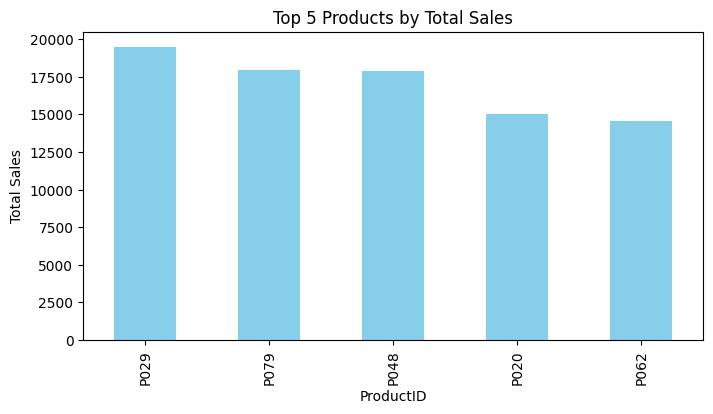

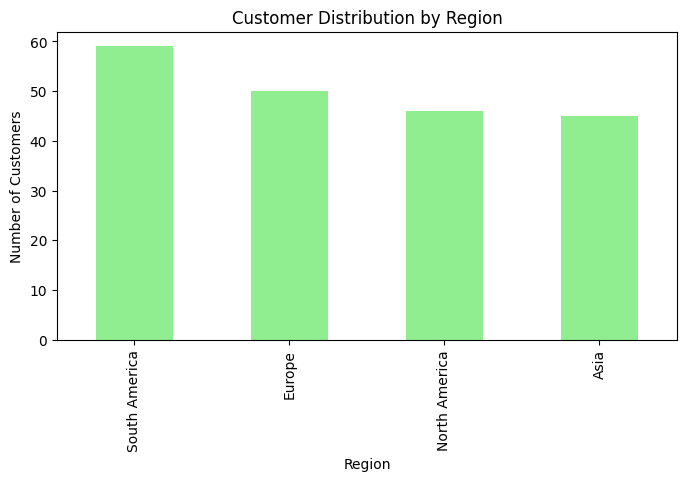

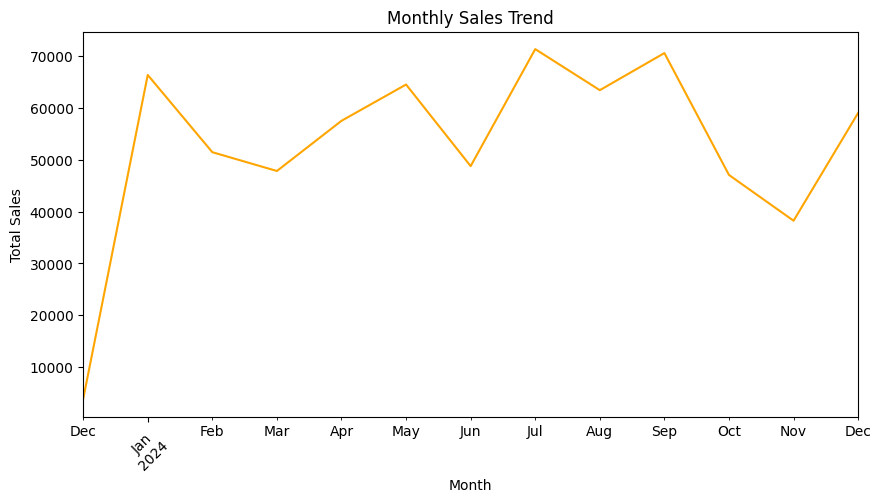

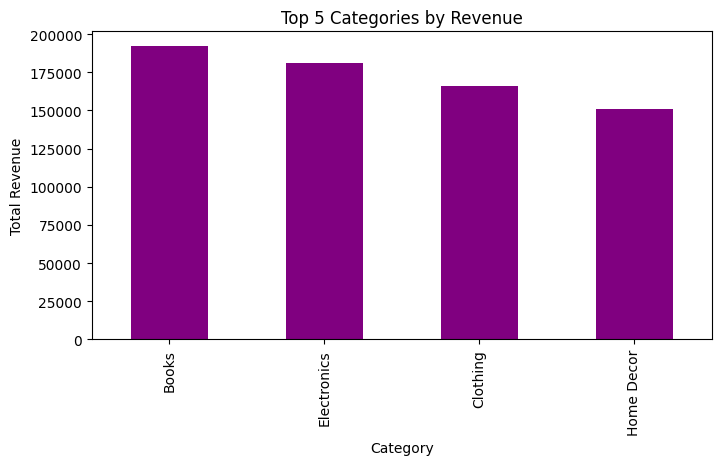

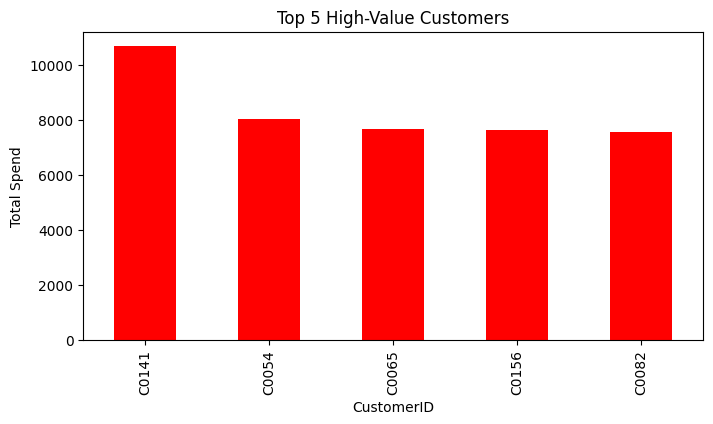

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv("Customers.csv")
products_df = pd.read_csv("Products.csv")
transactions_df = pd.read_csv("Transactions.csv")

# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

# --- EDA ---

# 1. Basic Information
print("Customers Dataset Info:")
print(customers_df.info())
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())

# 2. Descriptive Statistics
print("\nCustomers Dataset Statistics:")
print(customers_df.describe(include='all'))
print("\nProducts Dataset Statistics:")
print(products_df.describe(include='all'))
print("\nTransactions Dataset Statistics:")
print(transactions_df.describe(include='all'))

# 3. Missing Values
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())

# 4. Duplicates
print("\nDuplicate Rows in Customers Dataset:")
print(customers_df.duplicated().sum())
print("\nDuplicate Rows in Products Dataset:")
print(products_df.duplicated().sum())
print("\nDuplicate Rows in Transactions Dataset:")
print(transactions_df.duplicated().sum())

# 5. Visualizations

# Top Products by Sales
top_products = transactions_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('ProductID')
plt.ylabel('Total Sales')
plt.show()

# Customer Distribution by Region
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 4))
region_counts.plot(kind='bar', color='lightgreen')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Sales Trend Over Time
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
sales_trend = transactions_df.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
sales_trend.plot(color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Top Categories by Revenue
merged_data = pd.merge(transactions_df, products_df, on='ProductID', how='left')
top_categories = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
top_categories.plot(kind='bar', color='purple')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

# High Value Customers
high_value_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
high_value_customers.plot(kind='bar', color='red')
plt.title('Top 5 High-Value Customers')
plt.xlabel('CustomerID')
plt.ylabel('Total Spend')
plt.show()